























___
# MINIPROJETO 1

## Maria Clara Lorenzetti Luques
___

## Número de chegadas de turistas internacionais (apenas no mês de janeiro, por via aérea, chegando no estado de São Paulo, de 2010 a 2015, separadas por países)

___
### Itens 1 a 3 - Resolução:

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from numpy import arange

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\MLUQUES\Documents\Insper\CD\MiniProjeto1


In [30]:
'''Lendo dados'''

dados = pd.read_csv('spchegadas.csv',encoding='windows-1252', sep=";")

In [31]:
'''Atribuindoo variáveis, observando a variável'''

chegadas = dados.Chegadas
desc = chegadas.describe()
desc

count      336.000000
mean      2822.244048
std       5571.811796
min          0.000000
25%        293.000000
50%       1036.000000
75%       2896.500000
max      48411.000000
Name: Chegadas, dtype: float64

In [32]:
"Definindo valores interessantes"

media = desc[1]
pquad = desc[4]
mediana = desc[5]
tquad = desc[6]

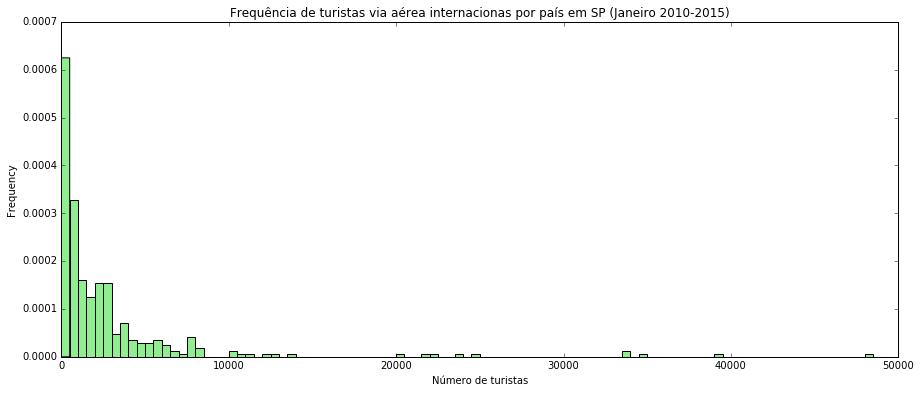

In [33]:
"Histograma dados"

faixa = arange(0,50000,500)
chegadas.plot.hist(bins=faixa, color='lightgreen', figsize=(15,6), normed=1)
plt.xlabel('Número de turistas')
plt.title('Frequência de turistas via aérea internacionas por país em SP (Janeiro 2010-2015)')
plt.show()

___
### Itens 4 a 6 - Resolução:

Exponencial negativa e assismetria positiva.
Usarei as funções log normal e exponecial.

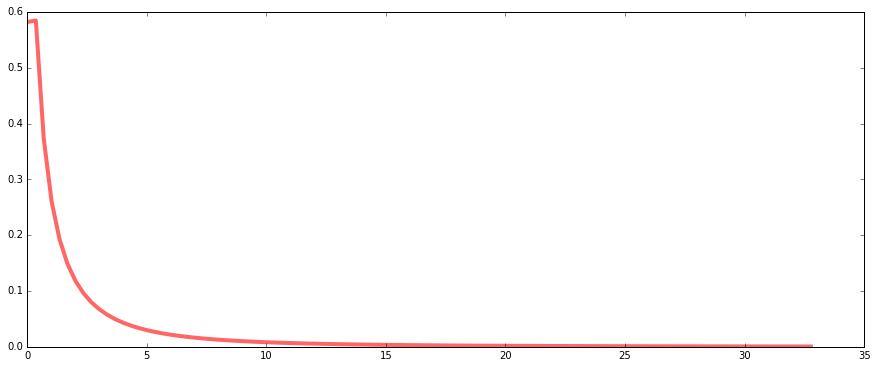

In [34]:
'''Log normal'''

s = 1.5
x = np.linspace(stats.lognorm.ppf(0.01, s), stats.lognorm.ppf(0.99, s), 100)

plt.figure(figsize=(15,6))
plt.plot(x, stats.lognorm.pdf(x, s),'r-', lw=4, alpha=0.6)
plt.show()

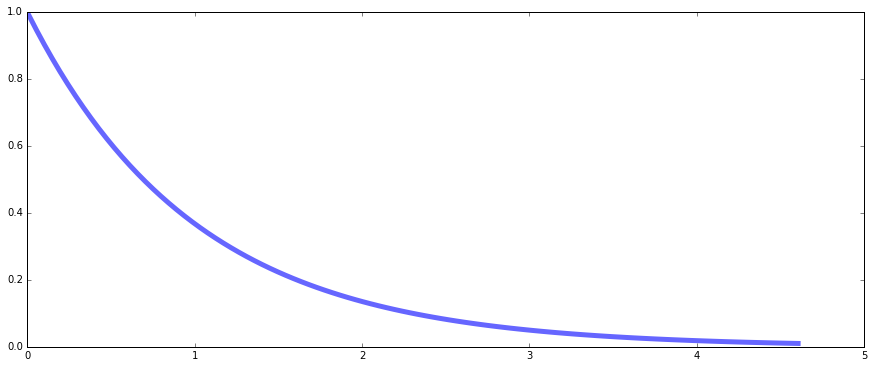

In [35]:
'''Exponencial'''

x = np.linspace(stats.expon.ppf(0.01), stats.expon.ppf(0.99), 100)
plt.figure(figsize=(15,6))
plt.plot(x, stats.expon.pdf(x), 'b-', lw=5, alpha=0.6, label='expon pdf')
plt.show()

Usando a função fit() nas funções teóricas:

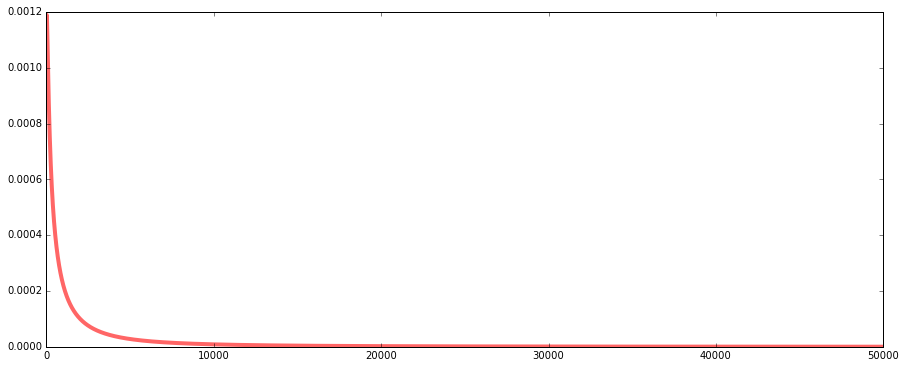

In [36]:
'''Fit na log normal'''

x = range(0,50000,5)
kelly = stats.lognorm.fit(chegadas)
plt.figure(figsize=(15,6))
plt.plot(x, stats.lognorm.pdf(x,kelly[0], kelly[1],kelly[2]),'r-', lw=4, alpha=0.6)
plt.show()

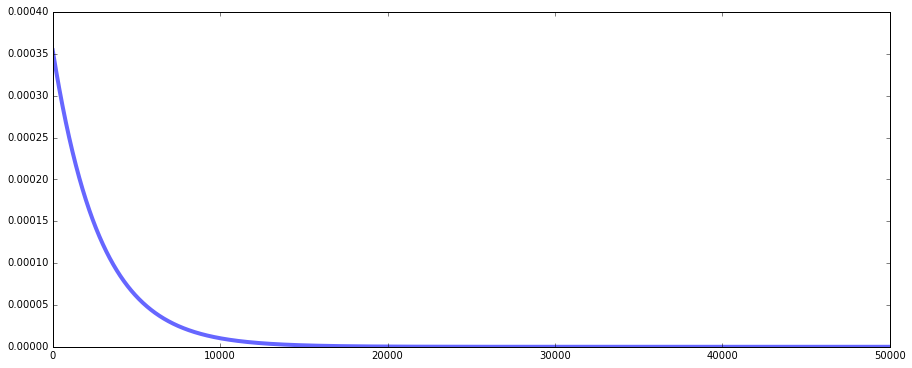

In [37]:
'''Fit na exponencial'''

victor = stats.expon.fit(chegadas)
plt.figure(figsize=(15,6))
plt.plot(x, stats.expon.pdf(x,victor[0], victor[1]),'b-', lw=4, alpha=0.6)
plt.show()

___
### Itens 7 a 9 - Resolução:

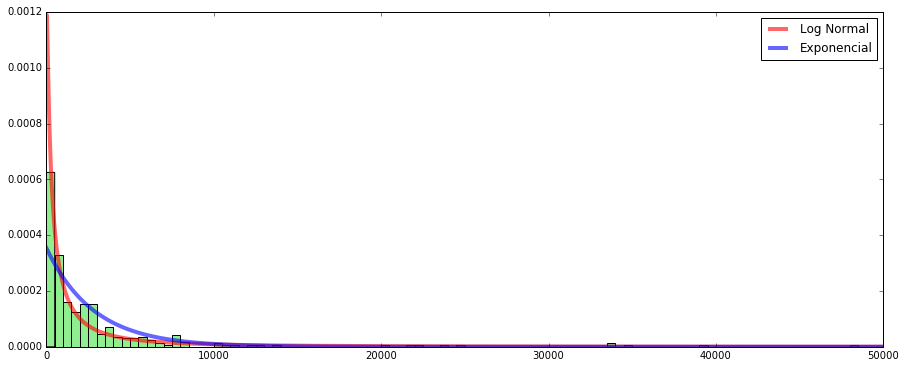

In [38]:
'''Histograma com funções teóricas'''

plt.figure(figsize=(15,6))
plt.hist(chegadas, bins=faixa, color='lightgreen', normed=1)
logn, = plt.plot(x, stats.lognorm.pdf(x,kelly[0], kelly[1],kelly[2]),'r-', lw=4, alpha=0.6)
expon, = plt.plot(x, stats.expon.pdf(x,victor[0], victor[1]),'b-', lw=4, alpha=0.6)
plt.legend([logn, expon], ["Log Normal", "Exponencial"], bbox_to_anchor=(1,1))
plt.show()

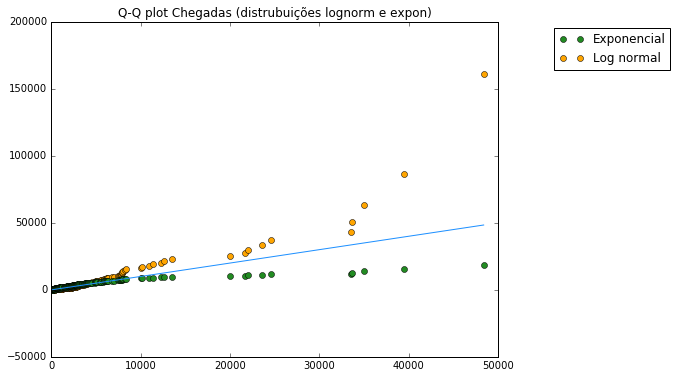

In [46]:
'''Fazendo o Q-Q plot'''

chegadas=sorted(chegadas)
fra = [] # frequencia relativa acumulada
for i in range(len(chegadas)):
    acumulada = (i + 0.5) / len(chegadas)
    if acumulada < 0:
        acumulada = 0
    fra.append(acumulada)

fra = pd.Series(data=fra)

q_log = stats.lognorm.ppf(fra, kelly[0], kelly[1], kelly[2]) 
q_exp = stats.expon.ppf(fra, victor[0], victor[1]) 

fig = plt.figure(figsize=(8,6))

plt.title("Q-Q plot Chegadas (distrubuições lognorm e expon)")

log, = plt.plot(chegadas, q_log, 'o', color="orange", label="Log normal")
exp, = plt.plot(chegadas, q_exp, 'o', color="forestgreen", label = "Exponencial")


plt.plot((min(chegadas), max(chegadas)), (min(chegadas), max(chegadas)), '-', color="dodgerblue")
plt.legend(handles=[exp, log], bbox_to_anchor=(1.4,1))

plt.show()

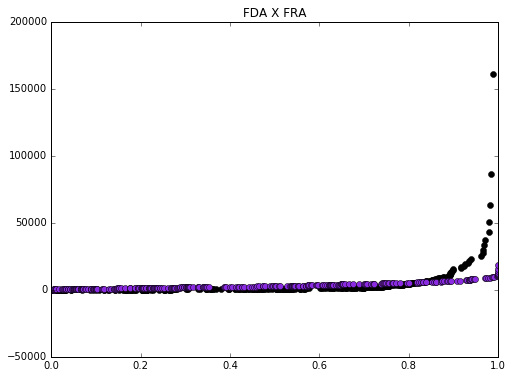

In [40]:
'''Fda vs Fra'''

cdf_log = stats.lognorm.cdf(chegadas, kelly[0], kelly[1], kelly[2])
cdf_exp = stats.expon.cdf(chegadas,  victor[0], victor[1])

plt.figure(figsize=(8,6))
plt.title("FDA X FRA")
log2 = plt.plot(cdf_log, q_log, 'o', color="black", label="Alpha")
exp2 = plt.plot(cdf_exp, q_exp, 'o', color="blueviolet", label = "Gamma")
plt.show()

In [54]:
'''Primeiro teste de aderência (erro quadrático)'''

eq_log = sum((chegadas - q_log)**2)
eq_exp = sum((chegadas - q_exp)**2)

print("Erro quadrático da log normal: {:4.3f}".format(eq_log))
print("Erro quadrático da exponencial: {:4.3f}".format(eq_exp))

Erro quadrático da log normal: 17354553852.662
Erro quadrático da exponencial: 3697091052.023


In [53]:
'''Segundo teste (erro quadrático médio)'''

eqm_log = eq_log/len(chegadas)
eqm_exp = eq_exp/len(chegadas)

print("Erro quadratico médio da log normal: ", eqm_log)
print("Erro quadratico médio da exponencial: ", eqm_exp)

Erro quadratico médio da log normal:  51650457.8948
Erro quadratico médio da exponencial:  11003247.1786


In [55]:
'''Soma das Diferenças'''

sd_log = sum(abs(chegadas - q_log))
sd_exp = sum(abs(chegadas - q_exp))

print("Soma de diferenças da log noraml: ", sd_log)
print("Soma de diferenças da exponencial: ", sd_exp)

Soma de diferenças da log noraml:  459389.197611
Soma de diferenças da exponencial:  389503.562299


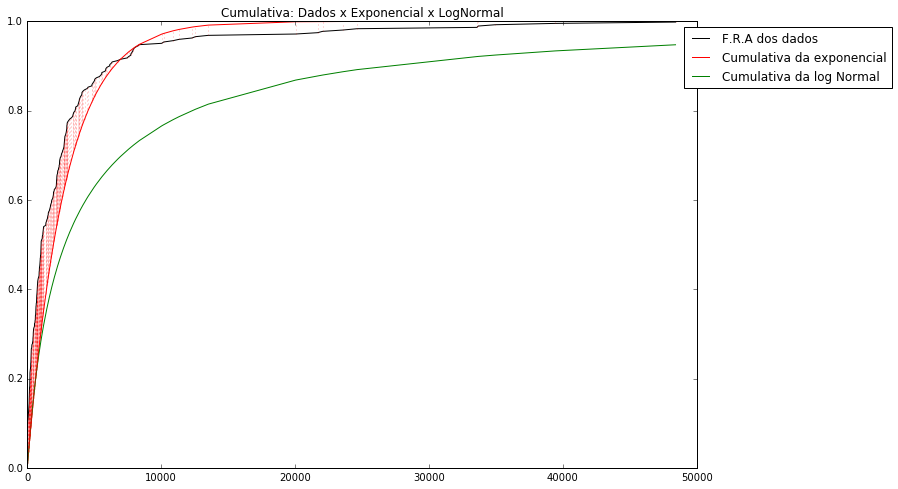

In [70]:
'''Cumulativa'''

k_gamma = 1.65

theta_gamma = media/k_gamma

cdf_log = stats.lognorm.cdf(chegadas, kelly[0], kelly[1],scale=media)
cdf_exp = stats.expon.cdf(chegadas, victor[0], victor[1])


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x LogNormal")

dados_fra_plot, = plt.plot(chegadas, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(chegadas, cdf_exp, '-', color='red', label = "Cumulativa da exponencial")
cdf_log_plot, = plt.plot(chegadas, cdf_log, '-', color='green', label = "Cumulativa da log Normal")

plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_log_plot], bbox_to_anchor=(1.3,1))

for i in range(len(chegadas)):
    plt.plot((chegadas[i], chegadas[i]), (fra[i], cdf_exp[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    #plt.plot((chegadas[i], chegadas[i]), (fra[i], cdf_log[i]), '--', color="green", alpha=0.3)

___
### Itens 10 e 11 - Resolução: